In [2]:
import numpy as np
from matplotlib import pyplot
from numpy.random import normal
from scipy.stats import norm

(array([1.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 1.200e+01, 2.100e+01,
        3.400e+01, 8.900e+01, 1.560e+02, 2.510e+02, 4.020e+02, 5.940e+02,
        7.290e+02, 9.050e+02, 1.037e+03, 1.125e+03, 1.083e+03, 9.540e+02,
        8.130e+02, 6.280e+02, 4.590e+02, 2.990e+02, 2.050e+02, 9.800e+01,
        5.900e+01, 2.200e+01, 1.300e+01, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([-4.40481418, -4.12317179, -3.8415294 , -3.55988701, -3.27824462,
        -2.99660223, -2.71495984, -2.43331745, -2.15167506, -1.87003267,
        -1.58839028, -1.30674789, -1.0251055 , -0.74346311, -0.46182072,
        -0.18017833,  0.10146406,  0.38310645,  0.66474884,  0.94639123,
         1.22803362,  1.50967601,  1.7913184 ,  2.07296079,  2.35460318,
         2.63624557,  2.91788796,  3.19953035,  3.48117274,  3.76281513,
         4.04445752]),
 <BarContainer object of 30 artists>)

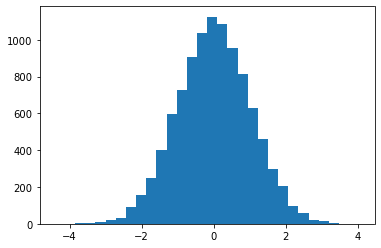

In [3]:
#generator
sample = normal(size=10000)
pyplot.hist(sample,bins= 30)

<h2>Parametric Estimating</h2>

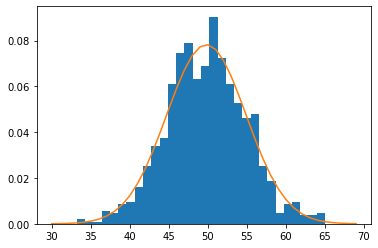

In [5]:
#mu=50, sigma=5 - experiment
sample = normal(loc=50, scale=5, size=1000)
#hypothesis model
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30,70)]
#probablity density function
probabilities = [dist.pdf(value) for value in values]
pyplot.hist(sample, bins=30, density=True)
pyplot.plot(values, probabilities)
pyplot.show()
#perfect fit only for infinite data

<h2>Non Parametric Estimating</h2>
<p>Kernel Density Estimation</p>
<p>Smoothing parameter</p>
<p>basis function</p>

In [6]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

In [7]:
#Bimodal Distribution
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

In [10]:
model = KernelDensity(bandwidth=2, kernel='gaussian')
#fix data structure, 1=one row
sample = sample.reshape((len(sample),1))
model.fit(sample)

KernelDensity(bandwidth=2)

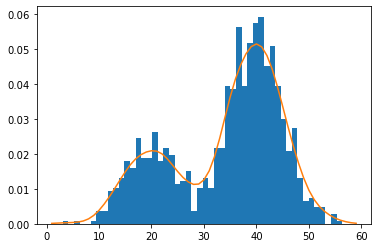

In [12]:
values = np.asarray([value for value in range(1,60)])
values = values.reshape(len(values), 1)
probabilities = model.score_samples(values) #log probability - adjust scale
probabilities = np.exp(probabilities) # inverse probability - orginal space

pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values, probabilities)
pyplot.show()